In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

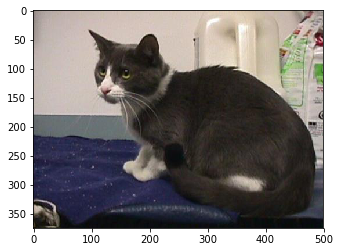

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [7]:
dog2 = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

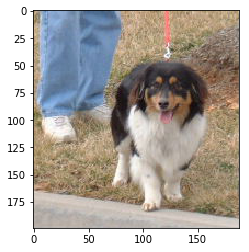

In [8]:
plt.imshow(dog2)

In [9]:
dog2.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

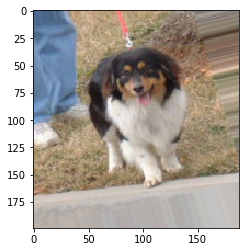

In [18]:
plt.imshow(image_gen.random_transform(dog2))

In [19]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
input_shape = (150,150,3)

In [29]:
input_shape[:2]

(150, 150)

In [21]:
from keras.models import Sequential

In [26]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])




In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [30]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [31]:
train_image_gen

In [32]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6252 images belonging to 2 classes.


In [33]:
test_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [34]:
results = model.fit_generator(train_image_gen,
                              epochs=1,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                              validation_steps=12)

Epoch 1/1
150/150 [==============================] - 308s 2s/step - loss: 0.6945 - acc: 0.5115 - val_loss: 0.7025 - val_acc: 0.5003


In [35]:
results.history['acc']

[0.5123379339562555]

In [36]:
from keras.models import load_model

In [37]:
new_model = load_model('cat_dog_100epochs.h5')

In [38]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

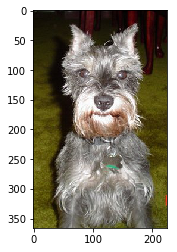

In [41]:
poom_dog = cv2.imread(dog_file)
poom_dog = cv2.cvtColor(poom_dog,cv2.COLOR_BGR2RGB)
plt.imshow(poom_dog)

In [42]:
from keras.preprocessing import image

In [43]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [45]:
type(dog_img)

PIL.Image.Image

In [46]:
dog_img = image.img_to_array(dog_img)

In [47]:
type(dog_img)

numpy.ndarray

In [48]:
dog_img.shape

(150, 150, 3)

In [49]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [50]:
dog_img.shape

(1, 150, 150, 3)

In [52]:
dog_img = dog_img/255

array([[[[0.13725491, 0.14509805, 0.09411765],
         [0.15686275, 0.16470589, 0.11372549],
         [0.21960784, 0.22745098, 0.18431373],
         ...,
         [0.05098039, 0.01568628, 0.01960784],
         [0.05098039, 0.01176471, 0.00784314],
         [0.03529412, 0.01960784, 0.01568628]],

        [[0.11372549, 0.11372549, 0.07450981],
         [0.11764706, 0.11764706, 0.07843138],
         [0.14901961, 0.14901961, 0.10980392],
         ...,
         [0.04313726, 0.00784314, 0.01176471],
         [0.04705882, 0.00784314, 0.01176471],
         [0.03921569, 0.01568628, 0.01568628]],

        [[0.07058824, 0.05098039, 0.02745098],
         [0.07843138, 0.05882353, 0.04313726],
         [0.07843138, 0.05882353, 0.04313726],
         ...,
         [0.04313726, 0.00784314, 0.01960784],
         [0.05098039, 0.00392157, 0.01960784],
         [0.04705882, 0.01176471, 0.01568628]],

        ...,

        [[0.4862745 , 0.47843137, 0.14509805],
         [0.46666667, 0.45882353, 0.13333334]

In [55]:
new_model.predict_classes(dog_img)

array([[1]])

In [57]:
new_model.predict(dog_img)

array([[0.9939143]], dtype=float32)

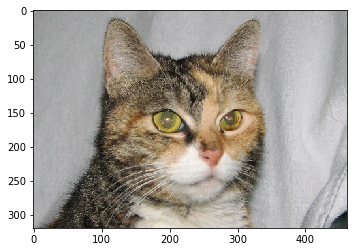

In [66]:
cat_file = 'CATS_DOGS/test/CAT/10006.jpg'
poom_cat = cv2.imread(cat_file)
poom_cat = cv2.cvtColor(poom_cat,cv2.COLOR_BGR2RGB)
plt.imshow(poom_cat)

In [67]:
cat_img = image.load_img(cat_file,target_size=(150,150))
cat_img = image.img_to_array(cat_img)
cat_img = np.expand_dims(cat_img,axis=0)
cat_img = cat_img/255

In [70]:
new_model.predict_classes(cat_img)

array([[0]])

In [69]:
new_model.predict(cat_img)

array([[0.02452537]], dtype=float32)